In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
import brian2 as b2
import slab as s
from consts import Paths
from pathlib import Path
import matplotlib.pyplot as plt
from analyze.report import generate_single_result
hrtf_paths = list(Path(Paths.SOFA_DIR).iterdir())
print(hrtf_paths)

2025-01-22 12:04:41,820 [INFO ]  

>>>>> start execution
[PosixPath('../data/SOFA/dtf_nh156.sofa'), PosixPath('../data/SOFA/dtf_las_nh1012.sofa'), PosixPath('../data/SOFA/hrtf b_nh15.sofa'), PosixPath('../data/SOFA/RIEC_hrir_subject_057.sofa')]


In [19]:
from cochleas.hrtf_utils import synthetic_ild
from utils.custom_sounds import Tone
import brian2hears as b2h

sound = Tone(5000*b2.Hz,200*b2.ms)
sound.sound.level = 80*b2h.dB

for angle in range(-90,91,15):
    synthetic_ild(sound,angle)

2025-01-21 21:40:00,055 [DEBUG]  -90 -> left -0.0; right -16.0285339468867
2025-01-21 21:40:00,056 [DEBUG]  original ILD: 16.0285339468867; new ILD: -16.0285339468867
2025-01-21 21:40:00,056 [DEBUG]  -75 -> left -0.5275491316929981; right -14.954825765155919
2025-01-21 21:40:00,056 [DEBUG]  original ILD: 15.482374896848917; new ILD: -15.482374896848917
2025-01-21 21:40:00,056 [DEBUG]  -60 -> left -1.859717123260112; right -12.021400460165024
2025-01-21 21:40:00,056 [DEBUG]  original ILD: 13.881117583425135; new ILD: -13.881117583425135
2025-01-21 21:40:00,057 [DEBUG]  -45 -> left -3.3196180728790132; right -8.014266973443348
2025-01-21 21:40:00,057 [DEBUG]  original ILD: 11.333885046322361; new ILD: -11.333885046322361
2025-01-21 21:40:00,057 [DEBUG]  -30 -> left -4.007133486721674; right -4.007133486721673
2025-01-21 21:40:00,057 [DEBUG]  original ILD: 8.014266973443348; new ILD: -8.014266973443348
2025-01-21 21:40:00,057 [DEBUG]  -15 -> left -3.0747816687957723; right -1.073708181730

## explore map of LSO/MSO freq correspondances


generating complete reports
using erbscale, center neuron for this freq should be (100.1169106 * hertz, 111)
2025-01-22 12:04:43,845 [DEBUG]  {'title': '2025-01-21T22:01:06 100. Hz input, filtered around 100. Hz', 'show_pops': ['LSO'], 'rate': False, 'hist_logscale': True}
2025-01-22 12:04:43,845 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]
WARNING    /tmp/ipykernel_1003942/2587655744.py:217: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]


using erbscale, center neuron for this freq should be (0.49933185 * khertz, 427)
2025-01-22 12:04:44,802 [DEBUG]  {'title': '2025-01-21T22:18:46 0.5 kHz input, filtered around 0.5 kHz', 'show_pops': ['LSO'], 'rate': False, 'hist_logscale': True}
2025-01-22 12:04:44,802 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]
WARNING    /tmp/ipykernel_1003942/2587655744.py:217: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]


using erbscale, center neuron for this freq should be (0.99969235 * khertz, 635)
2025-01-22 12:04:45,726 [DEBUG]  {'title': '2025-01-21T22:35:58 1. kHz input, filtered around 1. kHz', 'show_pops': ['LSO'], 'rate': False, 'hist_logscale': True}
2025-01-22 12:04:45,726 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]
WARNING    /tmp/ipykernel_1003942/2587655744.py:217: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]


using erbscale, center neuron for this freq should be (5.00026944 * khertz, 1211)
2025-01-22 12:04:46,651 [DEBUG]  {'title': '2025-01-21T22:52:53 5. kHz input, filtered around 5. kHz', 'show_pops': ['LSO'], 'rate': False, 'hist_logscale': True}
2025-01-22 12:04:46,651 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]
WARNING    /tmp/ipykernel_1003942/2587655744.py:217: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]
WARNING    /tmp/ipykernel_1003942/2587655744.py:223: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]
WARNING    /tmp/ipykernel_1003942/2587655744.py:225: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]


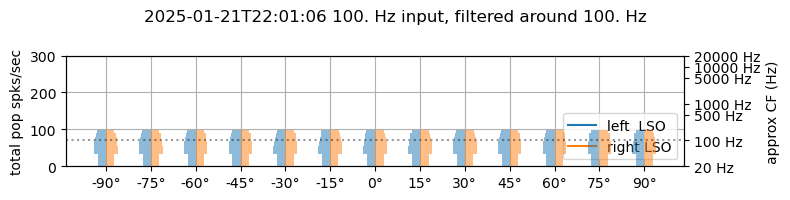

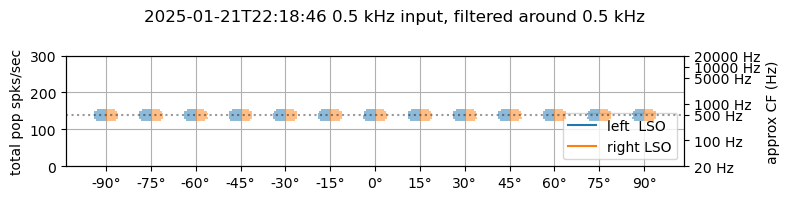

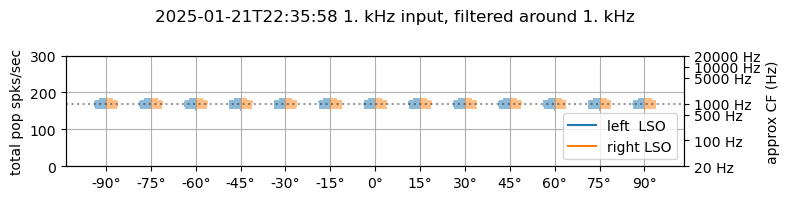

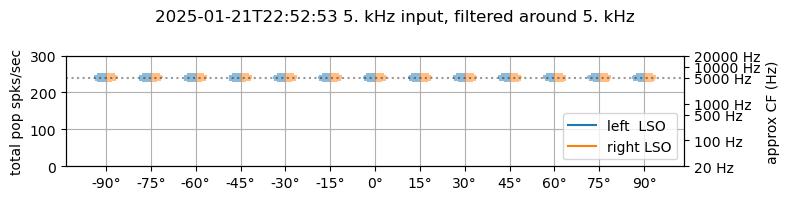

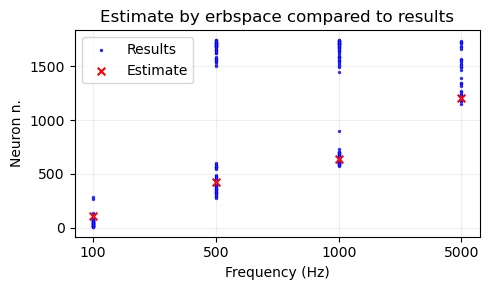

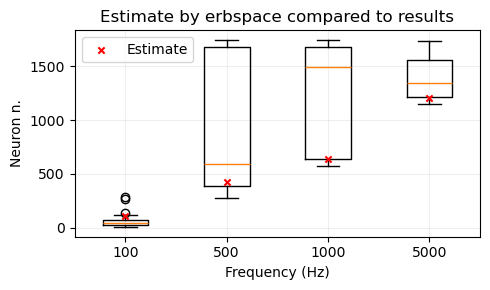

In [2]:
from collections import defaultdict
import dill
from brian2hears import erbspace
from cochleas.consts import CFMAX, CFMIN
import numpy as np
from analyze.report import draw_rate_vs_angle
from bisect import bisect_left


def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return (myList[0], 0)
    if pos == len(myList):
        return (myList[-1], len(myList))
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return (after, pos)
    else:
        return (before, pos - 1)


def plot_estimate_vs_results_scatter(data):
    fig, ax = plt.subplots(figsize=(5, 3))
    freqs = list(data.keys())

    for i, freq in enumerate(freqs):
        results = data[freq]["results"]
        ax.scatter(
            [i] * len(results),
            results,
            color="blue",
            alpha=0.8,
            s=2,
            label="Results" if freq == list(data.keys())[0] else "",
        )

        estimate = data[freq]["estimate"]
        ax.scatter(
            i,
            estimate,
            marker="x",
            color="red",
            s=30,
            label="Estimate" if freq == list(data.keys())[0] else "",
        )

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Neuron n.")
    ax.set_xticks(range(0, len(freqs)))
    ax.set_xticklabels([f"{freq:g}" for freq in freqs])
    ax.set_title("Estimate by erbspace compared to results")
    ax.legend()
    ax.grid(True, which="both", ls="-", alpha=0.2)
    plt.tight_layout()
    return fig, ax


def plot_estimate_vs_results_boxplot(data):
    fig, ax = plt.subplots(figsize=(5, 3))

    frequencies = list(data.keys())
    results_data = [np.array(data[freq]["results"]) for freq in frequencies]
    estimates = [data[freq]["estimate"] for freq in frequencies]

    bp = ax.boxplot(results_data)
    ax.scatter(
        range(1, len(frequencies) + 1),
        estimates,
        marker="x",
        color="red",
        s=20,
        zorder=3,
        label="Estimate",
    )
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Neuron n.")
    ax.legend()
    ax.set_xticks(range(1, len(frequencies) + 1))
    ax.set_xticklabels([f"{freq:g}" for freq in frequencies])
    ax.grid(True, which="both", ls="-", alpha=0.2)
    ax.set_title("Estimate by erbspace compared to results")
    plt.tight_layout()
    return fig, ax


def firing_neurons_distribution(x):
    "returns {neuron_id: num_spikes}"
    n2s = {id: 0 for id in x["global_ids"]}
    for sender in x["senders"]:
        n2s[sender] += 1
    return n2s


# results_dir = (
#     Path(Paths.RESULTS_DIR).absolute()
#     / "create_map_of_frequencies_in_LSO_MSO"
#     / "withICC&ppg&hrtf7"
# )
# results_dir = (
#     Path(Paths.RESULTS_DIR).absolute()
#     / "create_map_of_frequencies_in_LSO_MSO"
#     / "withICC&gammatone&hrtf7_gamm"
# )
# results_dir = (
#     Path(Paths.RESULTS_DIR).absolute()
#     / "create_map_of_frequencies_in_LSO_MSO"
#     / "withICC&TanCarney&increase_LSO_spikesMNTB-20level80dBLSOCm50"
# )
results_dir = (
    Path(Paths.RESULTS_DIR).absolute()
    / "create_map_of_frequencies_in_LSO_MSO"
    / "withICC&TanCarney&hrtf6_MNTBCs2LSOzero_unequaldistribution"
)

print("generating complete reports")
files = [i for i in results_dir.iterdir() if i.is_file() and str(i).endswith(".pic")]

freq_to_neur = defaultdict(dict)
POP = "LSO"


def range_around_center(center, radius, min_val=0, max_val=np.iinfo(np.int64).max):
    start = max(min_val, center - radius)
    end = min(max_val + 1, center + radius + 1)
    return np.arange(start, end)


def filter_spikes_close_to_freq(res, freq, pops):
    a2r = res["angle_to_rate"]
    for pop in pops:
        for side in ["L", "R"]:
            num_neurons = len(a2r[0][side][pop]["global_ids"])
            cf = erbspace(CFMIN, CFMAX, num_neurons)
            old2newid = {
                oldid: i for i, oldid in enumerate(a2r[0][side][pop]["global_ids"])
            }
            new2oldid = {v: k for k, v in old2newid.items()}

            center_neuron_for_freq = take_closest(cf, freq)[1]
            relevant_neurons = range_around_center(
                center_neuron_for_freq, radius=100, max_val=num_neurons - 1
            )
            relevant_neurons_ids = [new2oldid[i] for i in relevant_neurons]
            # we are assuming that the network does not change between angles, which i believe is a reasonable assumption
            for angle in a2r.keys():
                # print(f"working on {pop}{side}{angle}")
                # print(f"acceptable neurons are {relevant_neurons}")
                # print(f"acceptable neurons are {relevant_neurons_ids}")
                senders = a2r[angle][side][pop]["senders"]
                times = a2r[angle][side][pop]["times"]
                # ranges would be more efficient, but the overhead of conversion + extra code + maybe we decide to select them non contiguously...
                mask = np.isin(senders, relevant_neurons_ids)
                a2r[angle][side][pop]["senders"] = senders[mask]
                # print(f"which means that the result is {senders[mask]}")
                a2r[angle][side][pop]["times"] = times[mask]

    res["angle_to_rate"] = a2r

    return res


for i in files:
    with open(i, "rb") as f:
        res = dill.load(f)
    angle_to_rate = res["angle_to_rate"]
    angles = list(angle_to_rate.keys())
    freq = res["basesound"].frequency
    active_in_freq = set
    for angle in angles:
        x = angle_to_rate[angle]["L"][POP]
        old2newid = {oldid: i for i, oldid in enumerate(x["global_ids"])}
        distr = firing_neurons_distribution(x)
        # print(distr)
        neur_idx_to_spks = sorted(
            [(old2newid[k], v) for k, v in distr.items()],
            key=lambda x: x[1],
            reverse=True,
        )
        neur_idx_to_spks = {k: v for k, v in neur_idx_to_spks[:10]}

        active_in_freq = active_in_freq.union(set(neur_idx_to_spks.keys()))
    # print(f"for frequency {freq}, active neurons are {sorted(all_active_in_freq)}")
    cf = erbspace(CFMIN, CFMAX, len(angle_to_rate[0]["L"][POP]["global_ids"]))
    print(
        f"using erbscale, center neuron for this freq should be {take_closest(cf,freq)}"
    )
    freq_to_neur[freq / b2.Hz]["results"] = sorted(active_in_freq)
    freq_to_neur[freq / b2.Hz]["estimate"] = take_closest(cf, freq)[1]
    # fig = draw_rate_vs_angle(
    #     res,
    #     f"{i.name:.19} {freq}",
    #     rate=False,
    #     hist_logscale=True,
    #     show_pops=[POP],
    #     ylim=[0, 3000],
    #     show_freq=True,
    # )
    res = filter_spikes_close_to_freq(res, freq, pops=[POP])
    # res = filter_spikes_close_to_freq(res, 1000 * b2.Hz, pops=[POP])

    fig = draw_rate_vs_angle(
        res,
        f"{i.name:.19} {freq} input, filtered around {freq}",
        rate=False,
        hist_logscale=True,
        show_pops=[POP],
        ylim=[0, 300],
        show_freq=True,
    )
    fig.show()
    del res
# print(freq_to_neur)


fig, ax = plot_estimate_vs_results_scatter(freq_to_neur)
fig.show()
fig, ax = plot_estimate_vs_results_boxplot(freq_to_neur)
fig.show()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:06

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

2025-01-16 00:37:03,290 [DEBUG]  genenerating spikes for {'sound': <utils.custom_sounds.WhiteNoise object at 0x7f3f587d0d40>, 'angle': -45, 'plot_spikes': True, 'hrtf_params': {'subj_number': 7, 'ild_only': True, 'itd_remove_strategy': 'estimate_from_hrtf'}}
2025-01-16 00:37:03,323 [DEBUG]  calculating ITD between following sounds...
2025-01-16 00:37:03,327 [INFO ]  {'left_start_time': 5.6462585 * msecond, 'right_start_time': 6.12244898 * msecond}
2025-01-16 00:37:03,328 [INFO ]  calculated ITD of -0.47619048 ms. check graphical output for confirmation.
2025-01-16 00:37:03,328 [DEBUG]  current ITD is -0.47619048 ms
2025-01-16 00:37:03,328 [DEBUG]  synthetic ITD 

IHCsim:   0%|          | 0/10 [00:00<?, ?it/s]Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f3f62f9c540>
Traceback (most recent call last):
  File "/home/paolo/programs/micromamba/envs/hears/lib/python3.12/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 
IHCsim: 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


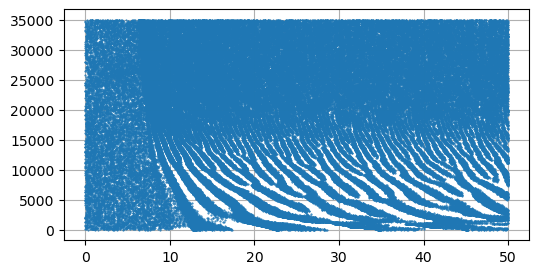

2025-01-16 00:37:13,266 [DEBUG]  working on ear R...


IHCsim: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


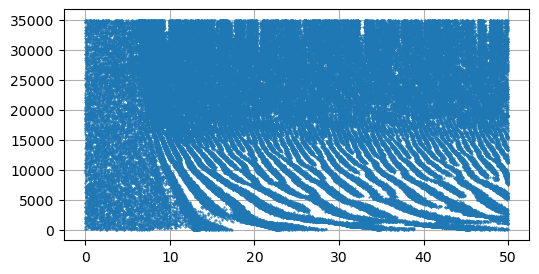

2025-01-16 00:37:22,443 [INFO ]  generation complete.


In [5]:
import brian2 as b2
import brian2hears as b2h
import nest
import numpy as np
from brian2 import *
from brian2hears import *

from cochleas.anf_utils import load_anf_response
from cochleas.GammatoneCochlea import sound_to_spikes as s2sGamm
from cochleas.TanCarneyCochlea import sound_to_spikes
from models.InhModel.params import Parameters as InhParam
from utils.custom_sounds import Tone, WhiteNoise
plt.close()
nest.set_verbosity("M_ERROR")

sound = WhiteNoise(50 * b2.ms, 80 * b2h.dB)
ANGLE = -45
params = InhParam()
# spikes_tc = s2sGamm.call(sound, ANGLE, params.cochlea["gammatone"], True)
spikes_real = sound_to_spikes.call(sound, ANGLE, params.cochlea["TanCarney"], True)


### Show spikes for a specific population/with a specific title

In [3]:
from analyze.report import (
    draw_rate_vs_angle,
    generate_multi_inputs_single_net,
    draw_single_angle_histogram,
)
import dill

POP = 'MSO'

for sel in [
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&higherrateMSO/2024-11-15T11:48:24&tone_100.Hz_70dB&gammatone&withICC&higherrateMSO.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T16:36:48&tone_0.5kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T16:41:34&tone_0.8kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T16:45:33&tone_1.kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T17:07:45&tone_5.kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T17:12:08&tone_10.kHz_70dB&gammatone&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:30:45&tone_100.Hz_70dB&TanCarney&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:35:41&tone_0.5kHz_70dB&TanCarney&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:41:05&tone_0.8kHz_70dB&TanCarney&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:57:58&tone_1.kHz_70dB&TanCarney&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T17:16:44&tone_5.kHz_70dB&TanCarney&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T17:21:29&tone_10.kHz_70dB&TanCarney&withICC&final.pic",
]:
    with open(sel, "rb") as f:
        res = dill.load(f)
        fig = draw_rate_vs_angle(
            res,
            f"",
            # f"MSO spikes for tone {res['basesound'].frequency}, $\Delta t_{'{'}inhi{'}'}=-0.4ms$,$\Delta t_{'{'}inhc{'}'}=0.2ms$",
            rate=False,
            show_pops=[POP],
            # ylim=[15000,30000]
            # ylim=[0,3100],
            show_hist=False
        )
        # fig = draw_single_angle_histogram(
        #     res,
        #     angle=0,
        #     fontsize=15
        #     # population=SBC"
        # )
        fig.show()
        fig.savefig(
            f"/home/paolo/Documents/school/master/polimi/thesis/polithesis/manuscript/pres/highresnew/{res["conf"]["cochlea_type"]}-{POP}-{res['basesound'].frequency}-nohist.png",
            # f"/home/paolo/Documents/school/master/polimi/thesis/polithesis/manuscript/pres/highresnew/SBC-example.png",
            transparent=True,
            dpi=600,
        )
        del res

2024-12-16 11:53:44,282 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:44,283 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


2024-12-16 11:53:44,780 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:44,781 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


2024-12-16 11:53:45,282 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:45,282 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


2024-12-16 11:53:45,749 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:45,749 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 18.05it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


### show best ITD for all MSO neurons for a specific input

neur of interest is 119409, which is the one spiking the most at 15


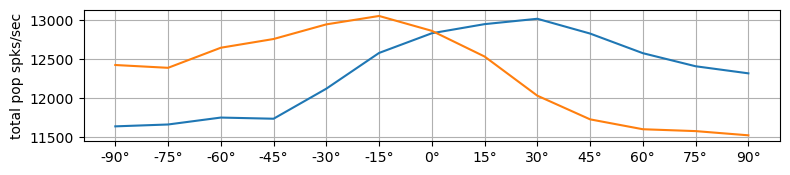

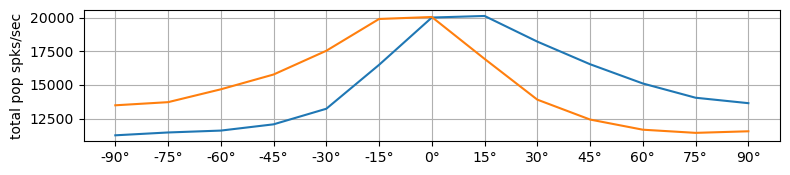

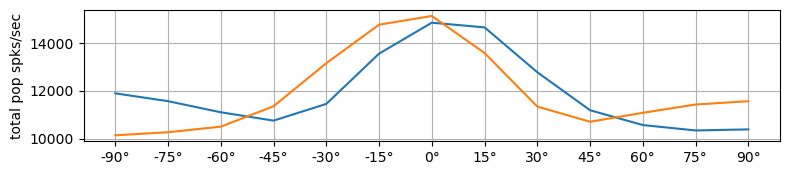

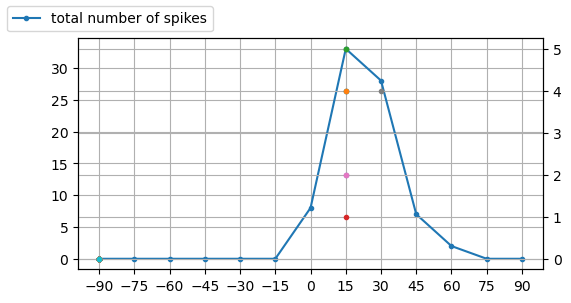

In [4]:
from collections import defaultdict
from analyze.report import draw_rate_vs_angle, generate_multi_inputs_single_net
import dill
import numpy as np

plt.close()


def spikest_neuron(d):
    times = d["times"]
    senders = d["senders"]
    id2spike = defaultdict(int)
    for i in senders:
        id2spike[i] += 1
    max_spikes = max(list(id2spike.values()))

    spikiest_neur = list(id2spike.keys())[np.argmax(list(id2spike.values()))]
    return spikiest_neur, max_spikes


def single_neuron_rate(data, check_angle=30):
    a2r = data["angle_to_rate"]
    angles = list(a2r.keys())
    fig, ax = plt.subplots(1, 1)
    num_neur = []
    num_spike = []
    neur2spikebyangle = defaultdict(list)
    single_neur_spike = []
    relevant_neuron, spikes = spikest_neuron(a2r[check_angle]["L"]["MSO"])
    relevant_neurons = [
        relevant_neuron,
        relevant_neuron + 1,
        relevant_neuron + 2,
        relevant_neuron + 3,
        relevant_neuron + 4,
        relevant_neuron + 5,
    ]
    relevant_neurons = a2r[0]['L']['MSO']['global_ids']

    for angle in angles:
        d = a2r[angle]["L"]["MSO"]
        times = d["times"]
        senders = d["senders"]
        num_neur.append(len(set(senders)))
        num_spike.append(len(times))
        id2spike = defaultdict(int)
        for i in senders:
            id2spike[i] += 1
        for n in relevant_neurons:
            neur2spikebyangle[n].append(id2spike[n])
    ax.plot(angles, num_spike, ".-", label="total number of spikes")
    fig.legend(loc='upper left')

    ax2 = ax.twinx()
    for n, spikes in neur2spikebyangle.items():
        # ax2.plot(angles, spikes, ".-", label=f"spikes neur of interest {n}")
        angle_max_spikes = angles[np.argmax(spikes)]
        ax2.plot(angle_max_spikes, max(spikes), ".-", label=f"spikes neur of interest {n}")
    ax.set_xticks(angles)
    # fig.legend()
    print(
        f"neur of interest is {relevant_neuron}, which is the one spiking the most at {check_angle}"
    )
    plt.show()


for sel in [
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&ppg&ppgcheck/2024-11-17T13:13:09&tone_100.Hz_70dB&ppg&withICC&ppgcheck.pic"
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&crazystronginh/2024-11-16T23:41:04&tone_0.5kHz_70dB&TanCarney&withICC&crazystronginh.pic"
]:
    with open(sel, "rb") as f:
        res = dill.load(f)
        single_neuron_rate(res, 15)
# best results with SBC 10, but they do not correspond to our metric

### Plot single scatterplot

In [ ]:
import brian2 as b2
import brian2hears as b2h
import nest
import numpy as np
from brian2 import *
from brian2hears import *

from cochleas.anf_utils import load_anf_response
from cochleas.GammatoneCochlea import sound_to_spikes as s2sGamm
from cochleas.TanCarneyCochlea import sound_to_spikes
from models.InhModel.params import Parameters as InhParam
from utils.custom_sounds import Tone, WhiteNoise

nest.set_verbosity("M_ERROR")

sound = WhiteNoise(100 * b2.ms, 80 * b2h.dB)
ANGLE = -90
params = InhParam()

# spikes_tc = s2sGamm.call(sound, ANGLE, params.cochlea["gammatone"], True)
spikes_real = sound_to_spikes.call(sound, ANGLE, params.cochlea["TanCarney"], True)

### Plot ITD and ILD derived from HRTF effect, for various HRTF and various frequencies

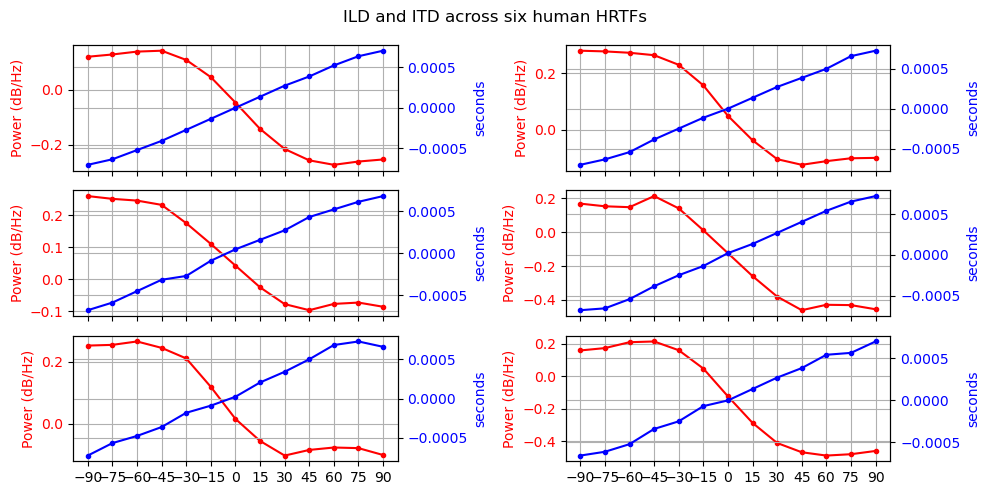

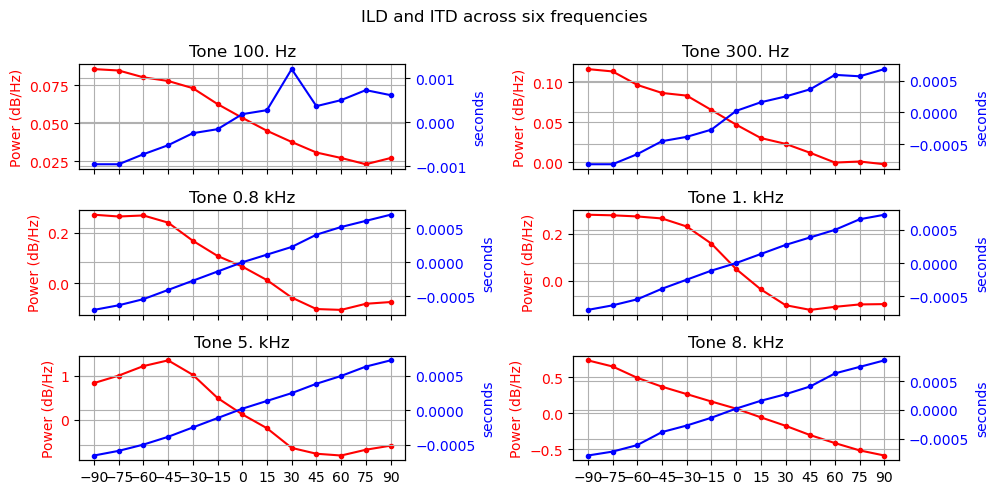

In [5]:
from analyze import sound_analysis as SA
from cochleas.GammatoneCochlea import run_hrtf
from utils.custom_sounds import Tone
from utils.log import logger
import logging


def draw_ITD_ILD(tone, angles, ild, subj_number, title=None):
    prev_level = logger.level
    logger.setLevel(logging.WARNING)
    # itd and ild functions are VERY verbose
    angle_to_ild = {}
    angle_to_itd = {}
    for angle in angles:
        binaural_sound = run_hrtf(
            tone,
            angle,
            subj_number,
        )
        left = binaural_sound.left
        right = binaural_sound.right
        angle_to_itd[angle] = SA.itd(left, right)
        ild_res, all_freq_diff = SA.ild(left, right, tone.sound)
        angle_to_ild[angle] = ild_res

        # total_diff = np.sum(all_freq_diff)
    ild.set_ylabel("Power (dB/Hz)", color="r")
    ild.plot(
        angles,
        [angle_to_ild[angle] for angle in angles],
        label="ILD",
        marker=".",
        color="r",
    )
    ild.tick_params(axis="y", labelcolor="r")
    itd = ild.twinx()
    itd.set_ylabel("seconds", color="b")
    itd.plot(
        angles,
        [angle_to_itd[angle] for angle in angles],
        label="ITD",
        marker=".",
        color="b",
    )
    itd.tick_params(axis="y", labelcolor="b")
    if title is not None:
        ild.set_title(title)
    plt.setp([ild, itd], xticks=angles)
    logger.level = prev_level
    return


from typing import Iterable


def flatten(items):
    """Yield items from any nested iterable.
    from https://stackoverflow.com/a/40857703
    """
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x


def wrap_to_avoid_polluting():
    plt.close()
    fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 5))
    axs = flatten(axs)
    tone = Tone(1000 * b2.Hz)
    angles = list(range(-90, 91, 15))
    for ax, subj_number in zip(axs, [0, 1, 2, 4, 5, 6, 7]):  # avoid 3 because it SUCKS
        draw_ITD_ILD(tone, angles, ax, subj_number)
    fig.suptitle("ILD and ITD across six human HRTFs")
    fig.tight_layout()
    fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 5))
    axs = flatten(axs)
    frequencies = [100, 300, 800, 1000, 5000, 8000] * b2.Hz
    tones = [Tone(i) for i in frequencies]
    angles = list(range(-90, 91, 15))
    for ax, tone, freq in zip(axs, tones, frequencies):
        draw_ITD_ILD(tone, angles, ax, 1, title=f"Tone {freq}")
    fig.suptitle("ILD and ITD across six frequencies")
    fig.tight_layout()


wrap_to_avoid_polluting()

In [6]:

from analyze.report import generate_network_vis
from pathlib import Path
import dill

sel = Path(
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T17:12:08&tone_10.kHz_70dB&gammatone&withICC&final.pic"
)
print(sel.name.replace('.pic', '.png'))

with open(sel, "rb") as f:
    res = dill.load(f)
    generate_network_vis(res, sel.parent / sel.name.replace('.pic', '.png'))

2024-11-15T17:12:08&tone_10.kHz_70dB&gammatone&withICC&final.png


In [7]:
hrtf = s.HRTF(hrtf_paths[2])
# print(hrtf.n_sources)
# fig, ax = plt.subplots(2)
# sourceidx = hrtf.cone_sources(0)
# ax[0].set_title("waterfall plot")
# ax[1].set_title("image plot")
# hrtf.plot_tf(sourceidx, ear='left', axis=ax[0], show=False, kind="waterfall")
# hrtf.plot_tf(sourceidx, ear='left', axis=ax[1], show=False, kind="image")
# plt.tight_layout()
# plt.show()


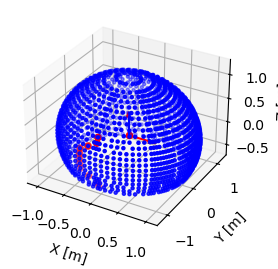

In [8]:
import brian2 as b2
import brian2hears as b2h
from utils.custom_sounds import Tone
import numpy as np
plt.close()
hrtf = s.HRTF(hrtf_paths[2])
# hrtf = s.HRTF.kemar()
input = Tone(100 * b2.Hz, 100 * b2.ms)


sourceidx = hrtf.cone_sources(-55, False)
hrtf.plot_sources(sourceidx)

# bin = hrtf.apply(sourceidx, s.Sound(input.sound))


# res = s.HRTF(hrtf_paths[2]).interpolate(-45,0).apply(s.Sound(input.sound).resample())
# print(res)


In [9]:
# next try SOFAR it seems integrated with pyfar